C:\Users\Jacob\AppData\Local\Temp\ipykernel_10980\843973217.py:95: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(wav_fname)


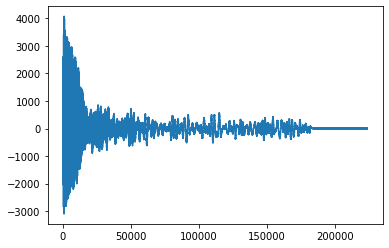

In [1]:
import ctcsound
from scipy import fftpack as fft
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
import scipy.io
#Load waveguide models

csd = '''
<CsoundSynthesizer>

<CsOptions>
  -d -o dac -m0
</CsOptions>

<CsInstruments>
sr     = 48000
kr     = 4800
nchnls = 2
0dbfs  = 1
          instr 1
ifreq     =         p3
iamp      =         p4
iatt      =         p5
isus      =         p6
irel      =         p7
inType    =         p8
inFilt    =         p9
ifilt     =         p10
ifdbk     =         p11
inGain    =         p12
ifltr1Tog =         p13
ifltr1Cut =         p14
inlTog    =         p15
inlType   =         p16
ifltr2Tog =         p17
ifltr2Cut =         p18


isec      =         1 / ifreq
asec      =         1 / ifreq

if (inType == 0) then
  a1      noise     iamp, inFilt
elseif (inType == 1) then
  a1      fractalnoise  iamp, 2
elseif (inType == 2) then
  a1      oscil     iamp, ifreq
endif

kenv      madsr     iatt, isec, isus, irel 

a1        =         a1 * inGain
a1        =         a1 * kenv

if (ifltr1Tog == 1) then
  a1      tone      a1, ifltr1Cut
endif

a2        delayr    1
a3        deltapi   asec
a4        tone      a3, ifilt
if (inlTog == 1) then
  a4      tanh      a4
endif
          delayw    a1 + (a4 * ifdbk)
if (ifltr2Tog == 1) then
  a4      tone      a4, ifltr2Cut
endif
          outs      a4, a4
          display a4, 1
          endin
</CsInstruments>

<CsScore>
; 1 2 3   4    5   6 7 8 9   10   11    121314  151617
i 1 0 440 0.05 0.1 0 0 0 0.3 5000 0.997 1 1 500 1 1 4000
i 1 2 550 0.05 0.1 0 0 2 0.3 5000 0.997 1 0 150 0 1`4000
e
</CsScore>
</CsoundSynthesizer>    
'''

# CODE TO PLAY CSOUND FILE
# cs = ctcsound.Csound()  
# ret = cs.compileCsdText(csd)
# if ret == ctcsound.CSOUND_SUCCESS:
#     cs.start()
#     cs.perform()
#     cs.reset()

data_dir = os.path.join(os.getcwd(), 'SoundFiles', 'Strings')
wav_fname = os.path.join(data_dir, 'guitarA3Piano.wav')

samplerate, data = wavfile.read(wav_fname)

plt.plot(data)